# Library 📚

In [37]:
import plotly.express as px 
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns
import re, pandas as pd
import numpy as np
from collections import Counter
import ast
from matplotlib.patches import Patch

# Load Dataset 📊

In [38]:
df=pd.read_csv('/Users/fredericmendessemedo/Desktop/Data - Next Step/PP1_Recherche_emploi/data/suivi_candidatures_Tableau.csv')
df.head()

,Poste,Date de Soumission,État,Lien,Date de réponse,CV utilisé,Entreprise,Mois,Catégorie Poste,Catégorie Poste (LLM),...,power bi,python,pytorch,redshift,scikit-learn,snowflake,spark,sql,tableau,tensorflow
0,Data Analyst Environnement,2025-07-31,Candidature envoyée,https://www.welcometothejungle.com/fr/companie...,NaN,CV2,Inex Circular,7.0,Data Analyst,Data Analyst,...,0,1,0,0,0,0,0,0,0,0
1,Data Engineer Junior,2025-07-31,Candidature envoyée,https://apply.workable.com/singulier/j/C258FD8...,NaN,CV2,Singulier,7.0,Data Engineer,Data Engineer,...,0,0,0,0,0,0,0,0,0,0
2,Data Analyst,2025-07-31,Candidature envoyée,https://www.welcometothejungle.com/fr/companie...,NaN,CV2,ARCEP,7.0,Data Analyst,Data Analyst,...,0,1,0,0,0,0,0,0,0,0
3,Data scientist,2025-07-31,Candidature envoyée,https://www.welcometothejungle.com/fr/companie...,NaN,CV2,Viginum,7.0,Data Scientist,Data Scientist,...,0,1,0,0,0,0,0,0,0,0
4,Data Scientist - Artifical Intelligence Projec...,2025-07-31,Refus,https://ekez.fa.em2.oraclecloud.com/hcmUI/Cand...,2025-08-01,CV2,Natixis,7.0,Data Scientist,Data Scientist,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.columns

Index(['Poste', 'Date de Soumission', 'État', 'Lien', 'Date de réponse',
       'CV utilisé', 'Entreprise', 'Mois', 'Catégorie Poste',
       'Catégorie Poste (LLM)', 'Offre (texte)', 'Compétences (LLM)',
       'airflow', 'aws', 'azure', 'bigquery', 'computer vision', 'databricks',
       'dbt', 'docker', 'excel', 'gcp', 'git', 'hadoop', 'jenkins', 'kafka',
       'keras', 'kubernetes', 'lightgbm', 'looker', 'metabase', 'mlflow',
       'mongodb', 'nlp', 'pandas', 'postgres', 'power bi', 'python', 'pytorch',
       'redshift', 'scikit-learn', 'snowflake', 'spark', 'sql', 'tableau',
       'tensorflow'],
      dtype='object')

# Vizualisations 🖼️

## Part 1 - Ma Recherche

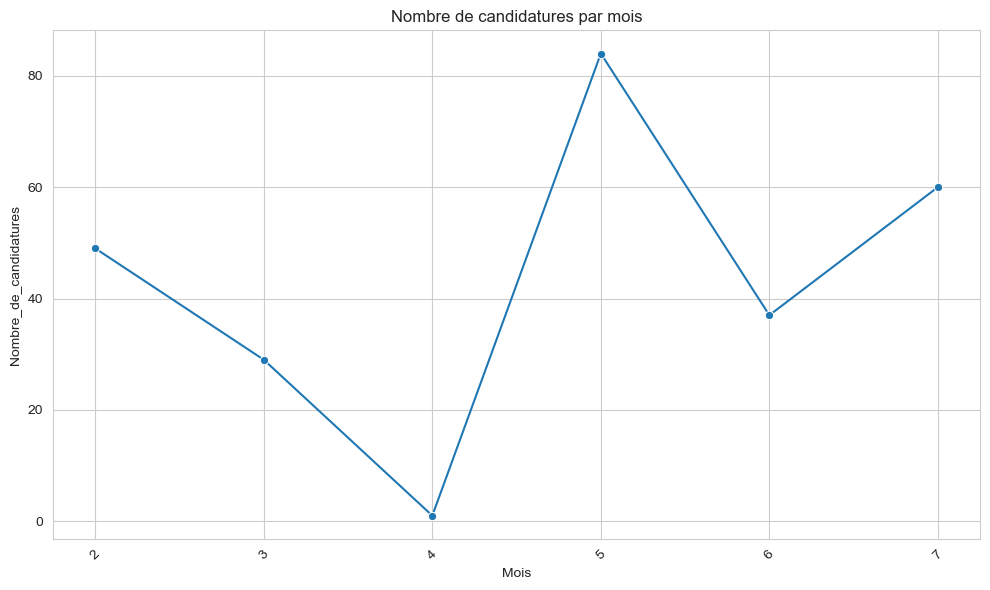

In [ ]:
df_nb_candidatures = df.groupby('Mois')['État'].count().reset_index()
df_nb_candidatures.rename(columns={'État': 'Nombre_de_candidatures'}, inplace=True)


plt.figure(figsize=(10, 6))
sns.lineplot(data=df_nb_candidatures, x='Mois', y='Nombre_de_candidatures', marker='o')
plt.title("Nombre de candidatures par mois")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.savefig("visualizations/01_candidatures_par_mois.png", dpi=160)
plt.show()
plt.close()


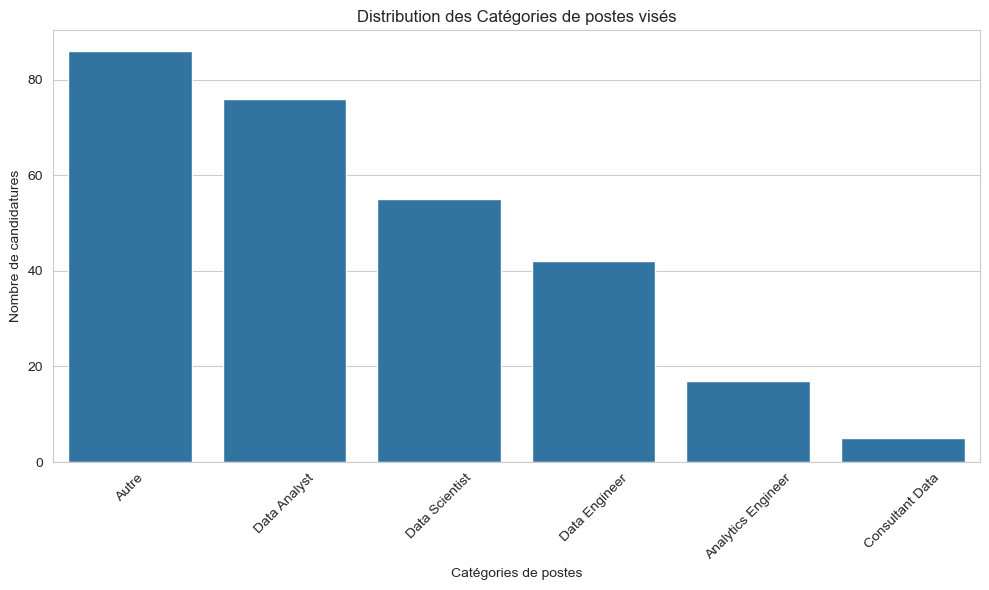

In [ ]:
df_categories = (
    df['Catégorie Poste (LLM)']
    .value_counts()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=df_categories, x='Catégorie Poste (LLM)', y='count')
plt.title("Distribution des Catégories de postes visés")
plt.xlabel("Catégories de postes")
plt.ylabel("Nombre de candidatures")
plt.xticks(rotation=45)
plt.grid(True,axis='y')
plt.tight_layout()

plt.savefig("visualizations/02_distribution_catégories_postes.png", dpi=160)
plt.show()
plt.close()



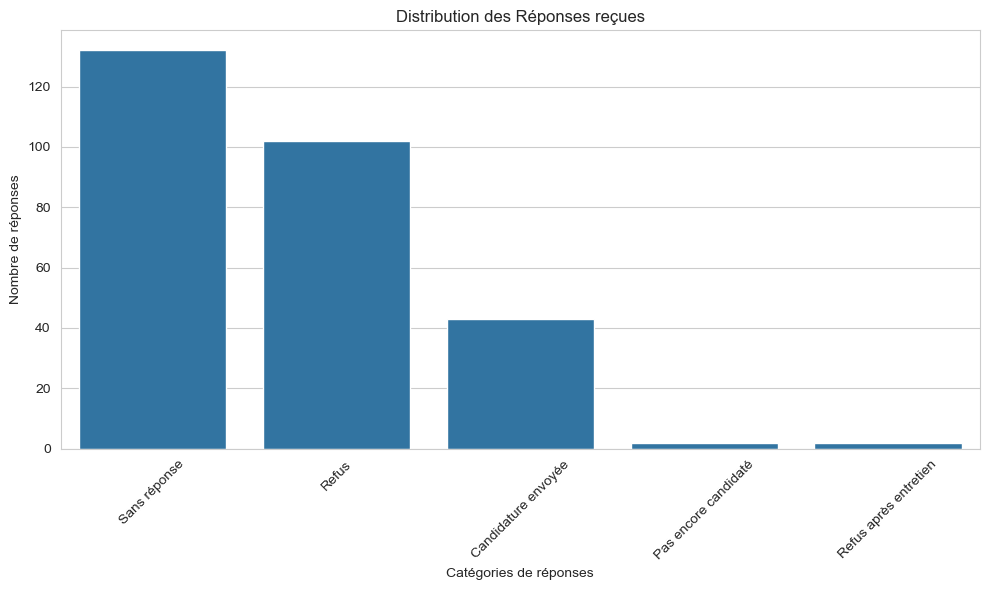

In [ ]:
df_categories = (
    df['État']
    .value_counts()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=df_categories, x='État', y='count')
plt.title("Distribution des Réponses reçues")
plt.xlabel("Catégories de réponses")
plt.ylabel("Nombre de réponses")
plt.xticks(rotation=45)
plt.grid(True,axis='y')
plt.tight_layout()

plt.savefig("visualizations/03_distribution_réponses_postes.png", dpi=160)
plt.show()
plt.close()

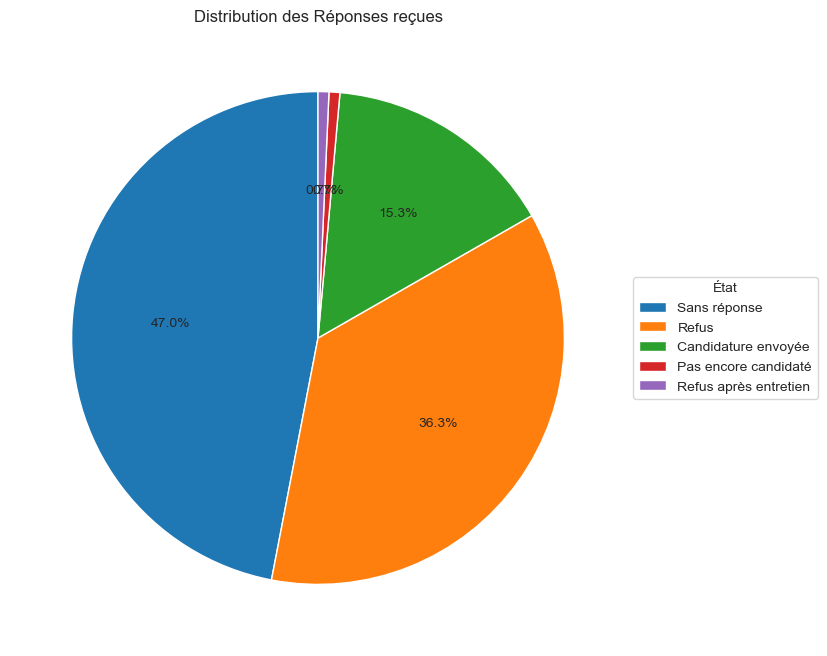

In [ ]:
values=df_categories['count']
labels=df_categories['État']

plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
wedges, texts, autotexts=plt.pie(values,labels=None,autopct="%1.1f%%", startangle=90)
plt.title("Distribution des Réponses reçues")
plt.legend(wedges, labels, title="État", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.savefig("visualizations/03.1_distribution_réponses_postes.png", dpi=160)
plt.show()
plt.close()

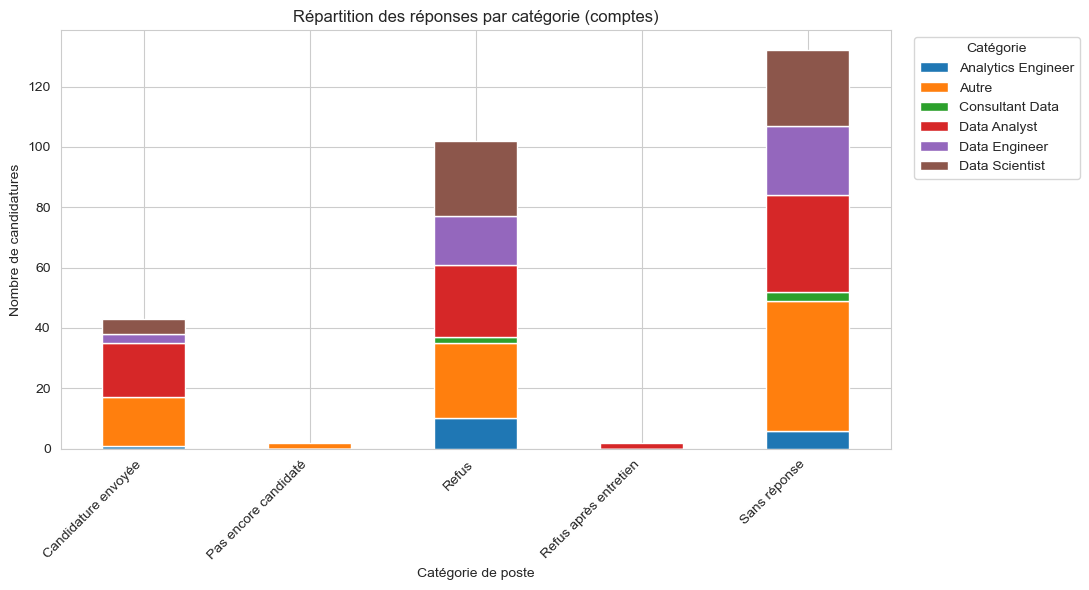

In [ ]:
df_nb_candidatures_categories = (df.groupby(['État','Catégorie Poste (LLM)']).size().unstack(fill_value=0))

fig=df_nb_candidatures_categories.plot(kind='bar',stacked=True,figsize=(11,6))
fig.set_title("Répartition des réponses par catégorie (comptes)")
fig.set_xlabel("Catégorie de poste")
fig.set_ylabel("Nombre de candidatures")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Catégorie", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()

plt.savefig("visualizations/04_répartition_réponses_par_catégorie.png", dpi=160)
plt.show()
plt.close()

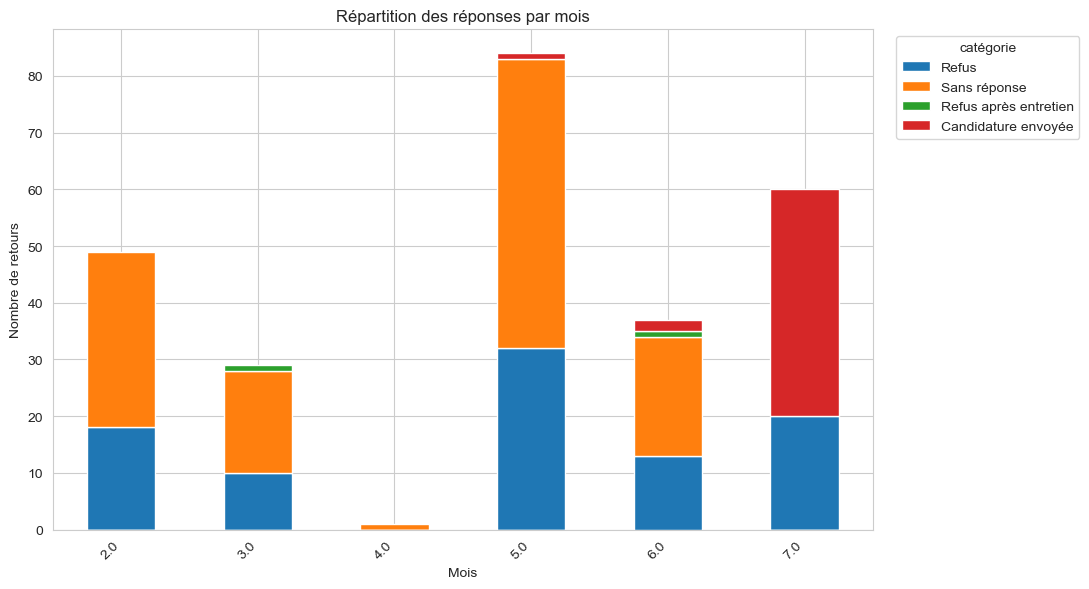

In [ ]:
df_nb_candidatures_mois = (df.groupby(['Mois','État']).size().unstack(fill_value=0))


fig=df_nb_candidatures_mois.plot(kind='bar',stacked=True,figsize=(11,6))
fig.set_title("Répartition des réponses par mois")
fig.set_xlabel("Mois")
fig.set_ylabel("Nombre de retours")
plt.xticks(rotation=45, ha="right")
plt.legend(title="catégorie", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()

plt.savefig("visualizations/05_répartition_réponses_par_mois.png", dpi=160)
plt.show()
plt.close()

## Part 2 - Mes Compétences 🙋‍♂️

### Market Skills 🔨

In [46]:
def to_skill_list(x):
    if isinstance(x, list):
        return [s.strip().lower() for s in x if isinstance(s, str) and s.strip()]
    if isinstance(x, str):
        raw = x.strip()
        if raw.startswith("[") and raw.endswith("]"):
            parts = [p.strip(" []'\"") for p in raw.split(",")]
            return [p.lower() for p in parts if p]
        return [p.strip().lower() for p in raw.split(",") if p.strip()]
    return []

In [47]:

COL_SKILLS = "Compétences (LLM)"
skills_lists = df[COL_SKILLS].apply(to_skill_list)
market_skills = sorted(set(s for lst in skills_lists for s in lst))
print(len(market_skills))
print(market_skills)


34
['airflow', 'aws', 'azure', 'bigquery', 'computer vision', 'databricks', 'dbt', 'docker', 'excel', 'gcp', 'git', 'hadoop', 'jenkins', 'kafka', 'keras', 'kubernetes', 'lightgbm', 'looker', 'metabase', 'mlflow', 'mongodb', 'nlp', 'pandas', 'postgres', 'power bi', 'python', 'pytorch', 'redshift', 'scikit-learn', 'snowflake', 'spark', 'sql', 'tableau', 'tensorflow']


In [48]:
skill_groups = {
    "Data Analyst": [
        "excel", "power bi", "tableau", "sql", "reporting", "statistics"
    ],
    "Data Scientist": [
        "python", "r", "scikit-learn","pandas", "numpy" "tensorflow", "pytorch",
        "machine learning", "deep learning", "nlp", "computer vision", 
    ],
    "Data Engineer": [
        "spark", "hadoop", "databricks", "airflow", "aws", "azure", "gcp",
        "docker", "kubernetes", "mongodb", "snowflake", "etl"
    ]
}

group_order = ["Data Analyst", "Data Scientist", "Data Engineer"]  # ordre visuel
group_colors = {
    "Data Analyst":  "#4e79a7",
    "Data Scientist":"#e15759",
    "Data Engineer": "#59a14f",
    "Autres":        "#9c755f",
}

alias_map = {
    "big query": "bigquery",
    "big query ": "bigquery",
    "postgre": "postgres",
    "postgresql": "postgres",
    "keras ": "keras",
    "powerbi": "power bi",
    "google bigquery": "bigquery",
}


### Personal Skills 🪛

In [49]:
my_cv_skills = ['airflow', 'aws', 'bigquery', 'databricks', 
                'docker', 'excel', 'git', 'jenkins', 
                'kubernetes', 'mlflow', 'pandas', 'postgres', 
                'python', 'scikit-learn', 'snowflake', 'sql', 'tensorflow']

MY_EXP_YEARS={
    'airflow':1, 'aws':0.6, 'bigquery':0.3, 'databricks':0.3, 
                'docker':0.6, 'excel':3, 'git':0.3, 'jenkins':0.6, 
                'kubernetes':0.6, 'mlflow':0.8, 'pandas':1, 'postgres':1, 
                'python':1, 'scikit-learn':1, 'snowflake':0.3, 'sql':1, 'tensorflow':0.3,'tableau':1
}


## Radar Vizualisations 📡

### Version 1 - Perso

In [50]:
ordered_skills = []
for group, skills in skill_groups.items():
    for skill in skills:
        if skill in market_skills:   # market_skills = compétences détectées par LLM
            ordered_skills.append(skill)

# 3. Ajouter les compétences restantes (non classées)
remaining_skills = [s for s in market_skills if s not in ordered_skills]
ordered_skills.extend(sorted(remaining_skills))

# 4. Construire les profils (binaire 0/1)
def skills_to_vector(skills, axes):
    return [1 if ax in skills else 0 for ax in axes]

market_vector = skills_to_vector(set(market_skills), ordered_skills)
cv_vector = skills_to_vector(set(my_cv_skills), ordered_skills)

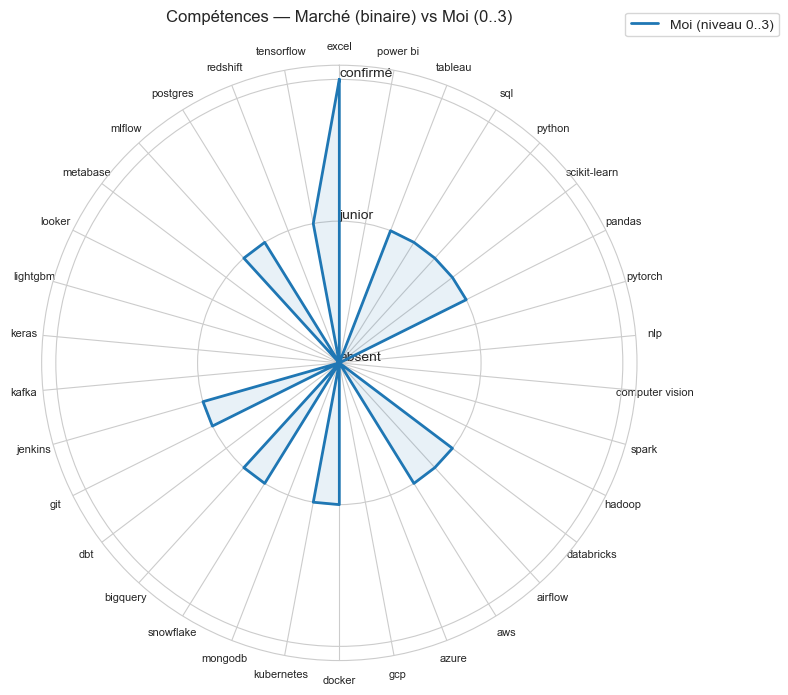

In [51]:
# ----- (3) Mapping années/labels -> niveaux 0..3 -----
def exp_to_level(v):
    if v is None:
        return 0
    if isinstance(v, str):
        v = v.strip().lower()
        if v in ("junior", "jr"):
            return 1
        if v in ("confirmé", "confirme", "intermediate", "mid", "middle"):
            return 2
        if v in ("senior", "sr"):
            return 3
        # si c'est une chaîne "2.5" par ex., on tente un float
        try:
            v = float(v.replace(",", "."))
        except:
            return 0
    # numérique -> seuils
    try:
        v = float(v)
    except:
        return 0
    if v <= 0:
        return 0
    if v < 3:
        return 1
    if v < 5:
        return 2
    return 3

# ----- (4) Construire les vecteurs -----
market_set = set(market_skills)
cv_levels = [exp_to_level(MY_EXP_YEARS.get(s, 0)) for s in ordered_skills]     # 0..3
market_vec = [1 if s in market_set else 0 for s in ordered_skills]             # 0/1

# S'assurer qu'il y a assez d'axes
if len(ordered_skills) < 3:
    raise ValueError("Pas assez de compétences pour un radar (au moins 3 axes).")

# ----- (5) Radar : marché (contour) vs toi (remplissage léger, gradué) -----
def radar_angles(n):
    ang = np.linspace(0, 2*np.pi, n, endpoint=False).tolist()
    return ang + ang[:1]

angles = radar_angles(len(ordered_skills))
m_vals = market_vec + market_vec[:1]
cv_vals = cv_levels + cv_levels[:1]

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Ticks radiaux: 0..3 et labels lisibles
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(["absent","junior","confirmé","senior"])
ax.set_rlabel_position(0)

# Axes (compétences)
ax.set_xticks(np.deg2rad(np.linspace(0, 360, len(ordered_skills), endpoint=False)))
ax.set_xticklabels(ordered_skills, fontsize=8)

# Tracé Marché: contour seul (pas de fill)
#ax.plot(angles, m_vals, linewidth=2, linestyle='-', label="Marché (≥1 occurrence)")

# Tracé CV: gradué 0..3, remplissage léger
ax.plot(angles, cv_vals, linewidth=2, linestyle='-', label="Moi (niveau 0..3)")
ax.fill(angles, cv_vals, alpha=0.10)

ax.set_title("Compétences — Marché (binaire) vs Moi (0..3)", pad=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.10))
plt.tight_layout()

plt.savefig("radar/1_competences_perso.png", dpi=160)
plt.show()

### Version 2 - Perso

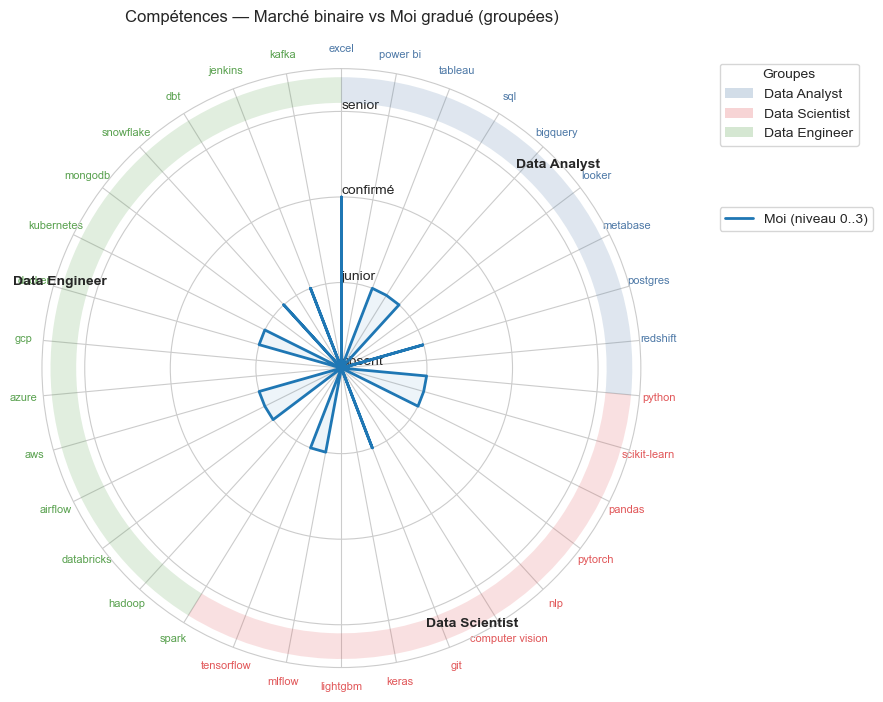

In [52]:
def norm_skill(s: str) -> str:
    s = s.strip().lower()
    return alias_map.get(s, s)

# Appliquer la normalisation aux jeux existants
market_skills = [norm_skill(s) for s in market_skills]
my_cv_skills  = [norm_skill(s) for s in my_cv_skills]

# --- 2) Étendre les groupes avec tes suggestions ---
# (en partant du dict skill_groups que tu avais déjà)
def add_many(group: str, skills: list[str]):
    for sk in skills:
        sk = norm_skill(sk)
        if sk not in skill_groups[group]:
            skill_groups[group].append(sk)

add_many("Data Analyst", [
    "bigquery", "looker", "metabase", "postgres", "redshift"
])

add_many("Data Engineer", [
    "dbt", "jenkins", "kafka"
])

add_many("Data Scientist", [
    "git", "keras", "lightgbm", "mlflow", "tensorflow"
])

# --- 3) Reconstruire l’ordre des axes (groupés) ---
all_known = set(market_skills) | set(my_cv_skills)

ordered_skills = []
group_spans = []
for g in group_order:
    gskills = [s for s in skill_groups[g] if s in all_known]
    if gskills:
        start = len(ordered_skills)
        ordered_skills.extend(gskills)
        end = len(ordered_skills)
        group_spans.append((g, start, end))

others = [s for s in sorted(all_known) if s not in ordered_skills]
if others:
    start = len(ordered_skills)
    ordered_skills.extend(others)
    end = len(ordered_skills)
    # garde "Autres" si vraiment il en reste encore
    group_spans.append(("Autres", start, end))

# --- 4) Recalculer les vecteurs et retracer le radar (binaire marché + niveau CV) ---
market_set = set(market_skills)
cv_levels  = [exp_to_level(MY_EXP_YEARS.get(s, 0)) for s in ordered_skills]   # 0..3
market_vec = [1 if s in market_set else 0 for s in ordered_skills]            # 0/1

# on peut réutiliser la fonction de plotting "zoning par groupe" que je t'ai donnée
# (celle avec l’anneau coloré par groupe) — il suffit de réexécuter le bloc d’affichage :

N = len(ordered_skills)
assert N >= 3, "Il faut au moins 3 compétences pour un radar (au moins 3 axes)."

angles = radar_angles(N)
m_vals = market_vec + market_vec[:1]
cv_vals = cv_levels + cv_levels[:1]

fig = plt.figure(figsize=(9, 9))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi/2); ax.set_theta_direction(-1)
ax.set_ylim(0, 3.5)
ax.set_yticks([0,1,2,3]); ax.set_yticklabels(["absent","junior","confirmé","senior"])
ax.set_rlabel_position(0)
ax.set_xticks(np.deg2rad(np.linspace(0, 360, N, endpoint=False)))
ax.set_xticklabels(ordered_skills, fontsize=8)

# --- anneau coloré par groupe (léger) ---
outer_bottom = 3.1; outer_height = 0.3
for (g, start, end) in group_spans:
    if end <= start: continue
    start_angle = 2*np.pi * (start / N)
    end_angle   = 2*np.pi * (end   / N)
    center = (start_angle + end_angle) / 2
    width  = (end_angle - start_angle)
    ax.bar(center, outer_height, width=width, bottom=outer_bottom,
           color=group_colors.get(g, "#999999"), alpha=0.18, edgecolor="none", align="center")
    ax.text(center, outer_bottom + outer_height + 0.02, g, ha="center", va="bottom",
            fontsize=10, fontweight="bold")

# colorer les labels selon groupe
ticks = ax.get_xticklabels()
for (g, start, end) in group_spans:
    col = group_colors.get(g, "#999999")
    for i in range(start, end):
        ticks[i].set_color(col)

# tracés : marché (contour) + moi (gradué)
#ax.plot(angles, m_vals, linewidth=2, linestyle='-', label="Marché (≥1 occurrence)")
ax.plot(angles, cv_vals, linewidth=2, linestyle='-', label="Moi (niveau 0..3)")
ax.fill(angles, cv_vals, alpha=0.08)

ax.set_title("Compétences — Marché binaire vs Moi gradué (groupées)", pad=16)

handles = [Patch(facecolor=group_colors.get(g, "#999999"), alpha=0.25, edgecolor='none', label=g)
           for g,_,_ in group_spans]
leg1 = ax.legend(handles=handles, title="Groupes", loc="upper left", bbox_to_anchor=(1.12, 1.02))
leg2 = ax.legend(loc="upper left", bbox_to_anchor=(1.12, 0.78))
ax.add_artist(leg1)

plt.tight_layout()

plt.savefig("radar/1.1_competences_perso.png", dpi=160)
plt.show()

### Visualisation par Catégorie 🔍

In [58]:
def plot_radar_category(
    df,
    category: str,
    col_category: str = "Catégorie Poste (LLM)",
    col_skills: str = "Compétences (LLM)",
    my_cv_skills: list | None = None,
    exp_years: dict | None = None,
    top_k: int = 12,
    metric: str = "binary",      # "binary" ou "freq_pct"
    skill_groups: dict | None = None,
    group_order: list | None = None,
    group_colors: dict | None = None,
    shade_groups: bool = True,
    title_prefix: str = "Compétences — ",
    save_path: str | None = None,
    overlay: bool = True,        # 👈 NOUVEAU
):

    def radar_angles(n):
        ang = np.linspace(0, 2*np.pi, n, endpoint=False).tolist()
        return ang + ang[:1]

    # 1) Filtre + parse
    df_cat = df[df[col_category] == category].copy()
    if df_cat.empty:
        raise ValueError(f"Aucune ligne pour la catégorie: {category}")
    cat_lists = df_cat[col_skills].apply(to_skill_list)

    # 2) Fréquences par offre
    offer_sets = cat_lists.apply(set)
    freq = Counter(s for st in offer_sets for s in st)
    n_offers = len(df_cat)

    # 3) Axes
    top_market = [s for s, _ in freq.most_common(top_k)]
    axes_skills = list(dict.fromkeys(top_market + (my_cv_skills or [])))
    if len(axes_skills) < 3:
        axes_skills = list(dict.fromkeys((my_cv_skills or []) + top_market))
    if len(axes_skills) < 3:
        raise ValueError("Pas assez de compétences pour tracer un radar (≥3).")

    # 4) Ordonner par groupes
    group_spans = []
    if skill_groups and group_order:
        ordered = []
        for g in group_order:
            gskills = [s for s in skill_groups.get(g, []) if s in axes_skills]
            if gskills:
                start = len(ordered)
                ordered.extend(gskills)
                end = len(ordered)
                group_spans.append((g, start, end))
        remaining = [s for s in axes_skills if s not in ordered]
        if remaining:
            start = len(ordered); ordered.extend(remaining); end = len(ordered)
            group_spans.append(("Autres", start, end))
        axes_skills = ordered

    # 5) Vecteurs
    if metric == "binary":
        market_vec = [1 if s in freq else 0 for s in axes_skills]
    elif metric == "freq_pct":
        market_vec = [(freq.get(s, 0) / max(n_offers,1)) for s in axes_skills]
    else:
        raise ValueError("metric doit être 'binary' ou 'freq_pct'")

    exp_years = exp_years or {}
    my_set = set([s.lower() for s in (my_cv_skills or [])])
    cv_vec = [exp_to_level(exp_years.get(s, (1 if s in my_set else 0))) for s in axes_skills]

    # 6) Plot (overlay ou split)
    if overlay:
        fig = plt.figure(figsize=(9,9))
        axs = [plt.subplot(111, polar=True)]
    else:
        fig, axs = plt.subplots(1, 2, figsize=(14,7), subplot_kw=dict(polar=True))
    rmax = 3.5
    angles = radar_angles(len(axes_skills))

    def setup_ax(ax):
        ax.set_theta_offset(np.pi/2); ax.set_theta_direction(-1)
        ax.set_ylim(0, rmax)
        ax.set_yticks([0,1,2,3]); ax.set_yticklabels(["absent","junior","confirmé","senior"])
        ax.set_rlabel_position(0)
        ax.set_xticks(np.deg2rad(np.linspace(0, 360, len(axes_skills), endpoint=False)))
        ax.set_xticklabels(axes_skills, fontsize=8)

        if shade_groups and group_spans and group_colors:
            outer_bottom = rmax - 0.35; outer_height = 0.30
            for (g, start, end) in group_spans:
                if end <= start: continue
                start_angle = 2*np.pi * (start / len(axes_skills))
                end_angle   = 2*np.pi * (end   / len(axes_skills))
                center = (start_angle + end_angle) / 2
                width  = (end_angle - start_angle)
                ax.bar(center, outer_height, width=width, bottom=outer_bottom,
                       color=group_colors.get(g, "#999"), alpha=0.18, edgecolor="none", align="center")
                ax.text(center, outer_bottom + outer_height + 0.02, g,
                        ha="center", va="bottom", fontsize=10, fontweight="bold")
            # colorer labels
            ticks = ax.get_xticklabels()
            for (g, start, end) in group_spans:
                col = group_colors.get(g, "#999")
                for i in range(start, end):
                    ticks[i].set_color(col)

    # Marché seul
    setup_ax(axs[0])
    m_vals = market_vec + market_vec[:1]
    axs[0].plot(angles, m_vals, linewidth=2, linestyle='-')
    axs[0].set_title(f"{title_prefix}{category}\nMarché", pad=14)

    if overlay:
        # Moi superposé
        cv_vals = cv_vec + cv_vec[:1]
        axs[0].plot(angles, cv_vals, linewidth=2, linestyle='-')
        axs[0].fill(angles, cv_vals, alpha=0.08)
        axs[0].legend(["Marché", "Moi (0..3)"], loc="upper right", bbox_to_anchor=(1.25, 1.10))
    else:
        # Moi séparé (deuxième panneau)
        setup_ax(axs[1])
        cv_vals = cv_vec + cv_vec[:1]
        axs[1].plot(angles, cv_vals, linewidth=2, linestyle='-')
        axs[1].fill(angles, cv_vals, alpha=0.08)
        axs[1].set_title(f"{title_prefix}{category}\nMoi (0..3)", pad=14)

    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=160, bbox_inches="tight")
    return fig, (axs if not overlay else axs[0])


In [59]:
group_order  = ["Data Analyst","Data Scientist","Data Engineer","Autres"]
group_colors = {"Data Analyst":"#4e79a7","Data Scientist":"#e15759","Data Engineer":"#59a14f","Autres":"#9c755f"}

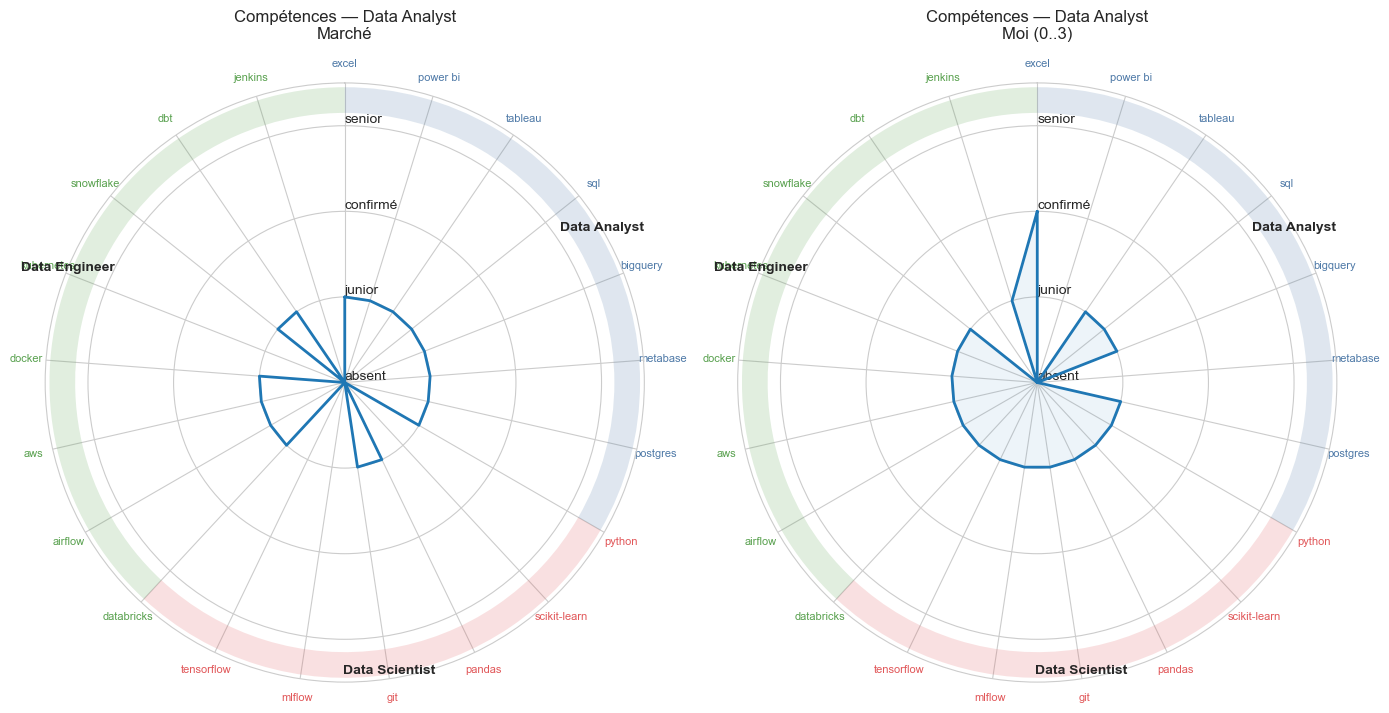

In [64]:
CATEGORY="Data Analyst"
METRIC="binary"
SAVE_PATH="radar/2_Data Analyst_vs_moi.png"

fig,ax=plot_radar_category(
    df,
    category=CATEGORY,
    col_category="Catégorie Poste (LLM)",
    col_skills="Compétences (LLM)",
    my_cv_skills=my_cv_skills,
    exp_years=MY_EXP_YEARS,
    top_k=10,
    metric=METRIC,                              
    skill_groups=skill_groups,
    group_order=group_order,
    group_colors=group_colors,
    shade_groups=True,
    save_path=SAVE_PATH,
    overlay=False
)

plt.show()

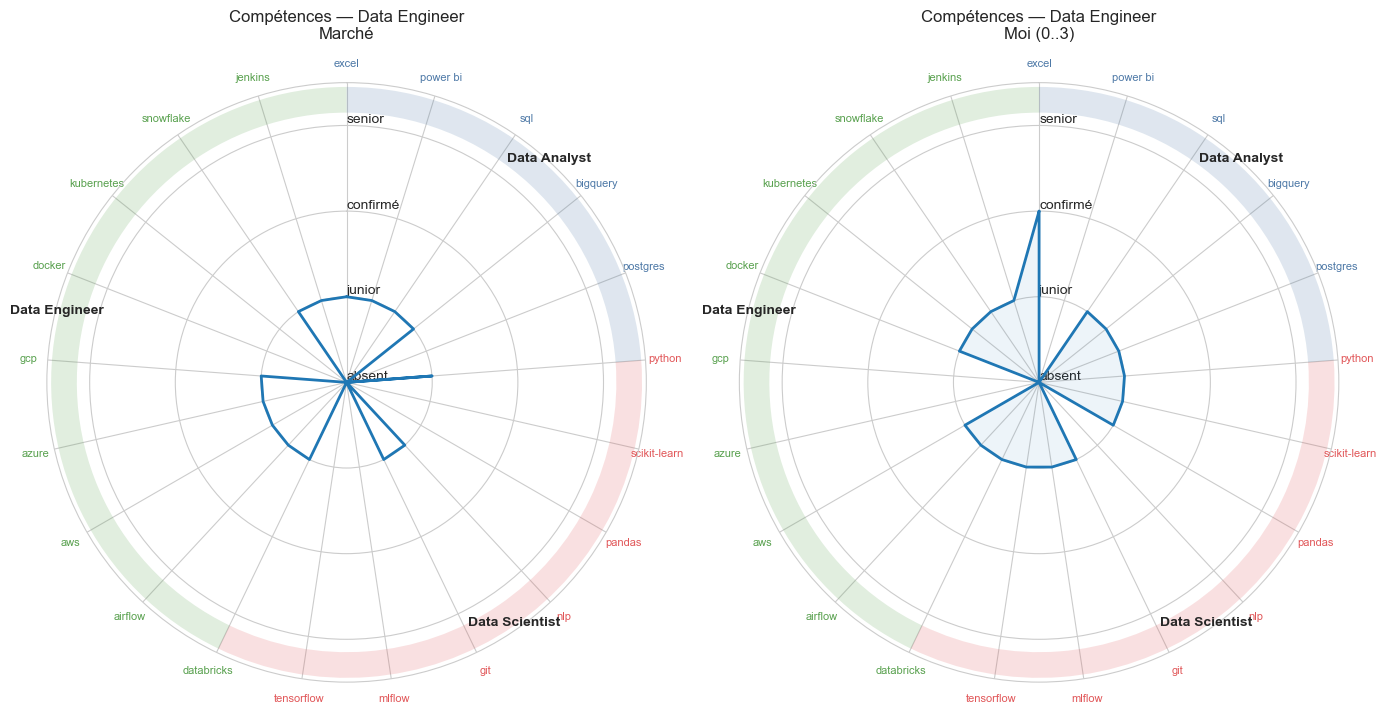

In [67]:
CATEGORY="Data Engineer"
METRIC="binary"
SAVE_PATH="radar/3_Data Engineer_vs_moi.png"

fig,ax=plot_radar_category(
    df,
    category=CATEGORY,
    col_category="Catégorie Poste (LLM)",
    col_skills="Compétences (LLM)",
    my_cv_skills=my_cv_skills,
    exp_years=MY_EXP_YEARS,
    top_k=10,
    metric=METRIC,                              
    skill_groups=skill_groups,
    group_order=group_order,
    group_colors=group_colors,
    shade_groups=True,
    save_path=SAVE_PATH,
    overlay=False
)

plt.show()

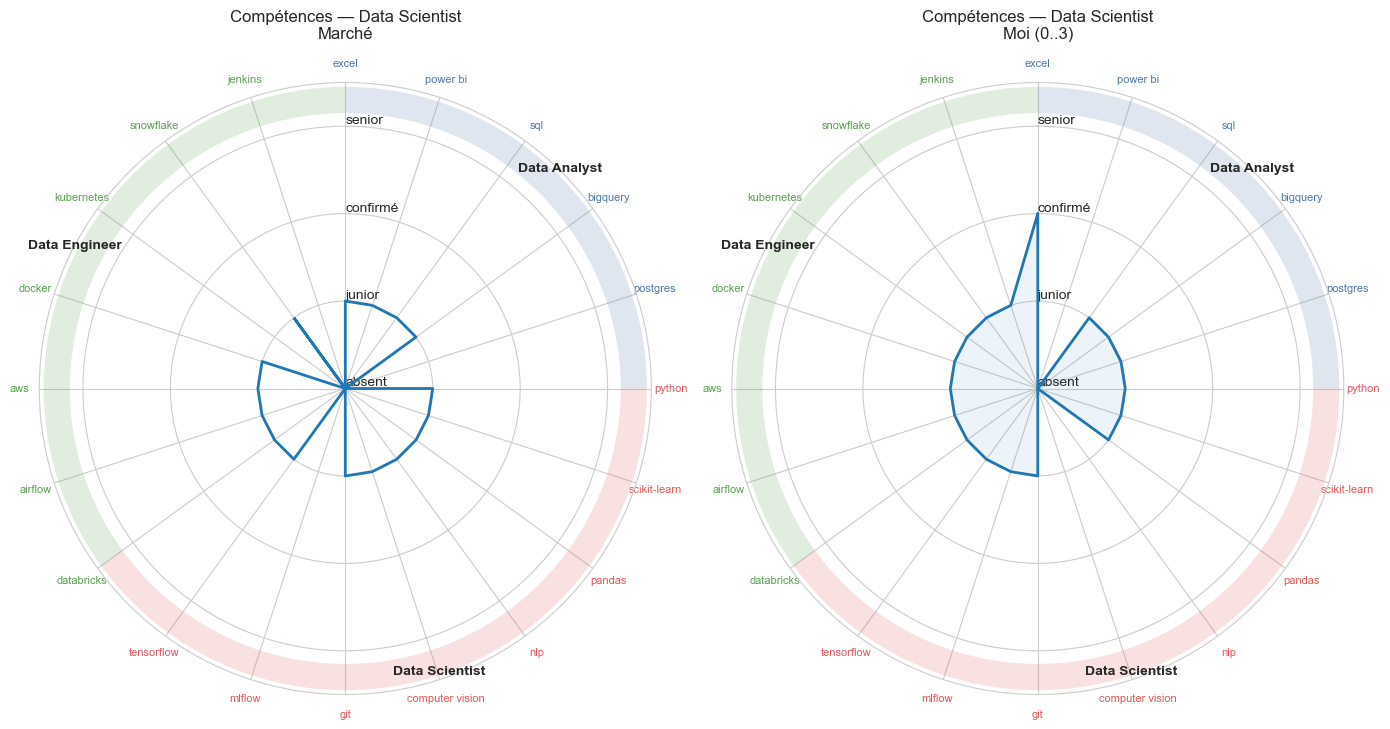

In [68]:
CATEGORY="Data Scientist"
METRIC="binary"
SAVE_PATH="radar/4_Data Scientist_vs_moi.png"

fig,ax=plot_radar_category(
    df,
    category=CATEGORY,
    col_category="Catégorie Poste (LLM)",
    col_skills="Compétences (LLM)",
    my_cv_skills=my_cv_skills,
    exp_years=MY_EXP_YEARS,
    top_k=10,
    metric=METRIC,                              
    skill_groups=skill_groups,
    group_order=group_order,
    group_colors=group_colors,
    shade_groups=True,
    save_path=SAVE_PATH,
    overlay=False
)

plt.show()

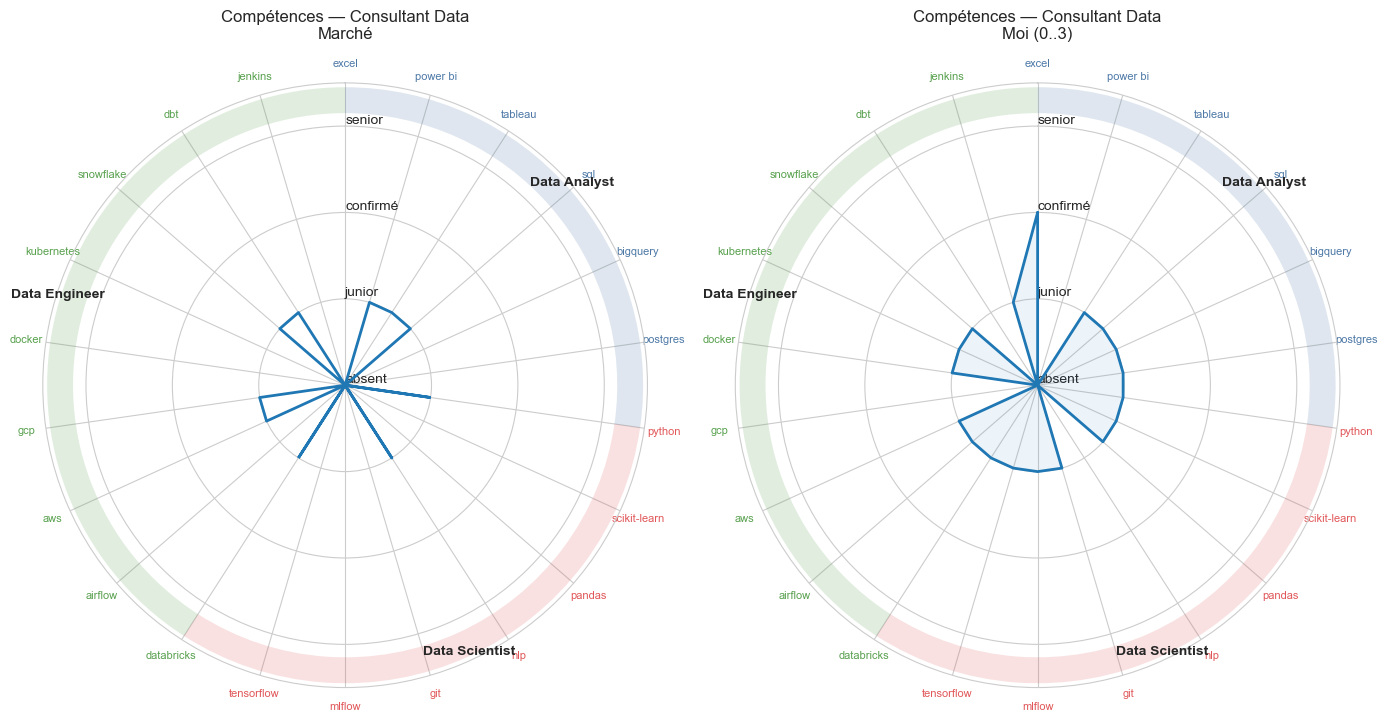

In [69]:
CATEGORY="Consultant Data"
METRIC="binary"
SAVE_PATH="radar/5_Consultant_Data_vs_moi.png"

fig,ax=plot_radar_category(
    df,
    category=CATEGORY,
    col_category="Catégorie Poste (LLM)",
    col_skills="Compétences (LLM)",
    my_cv_skills=my_cv_skills,
    exp_years=MY_EXP_YEARS,
    top_k=10,
    metric=METRIC,                              
    skill_groups=skill_groups,
    group_order=group_order,
    group_colors=group_colors,
    shade_groups=True,
    save_path=SAVE_PATH,
    overlay=False
)

plt.show()

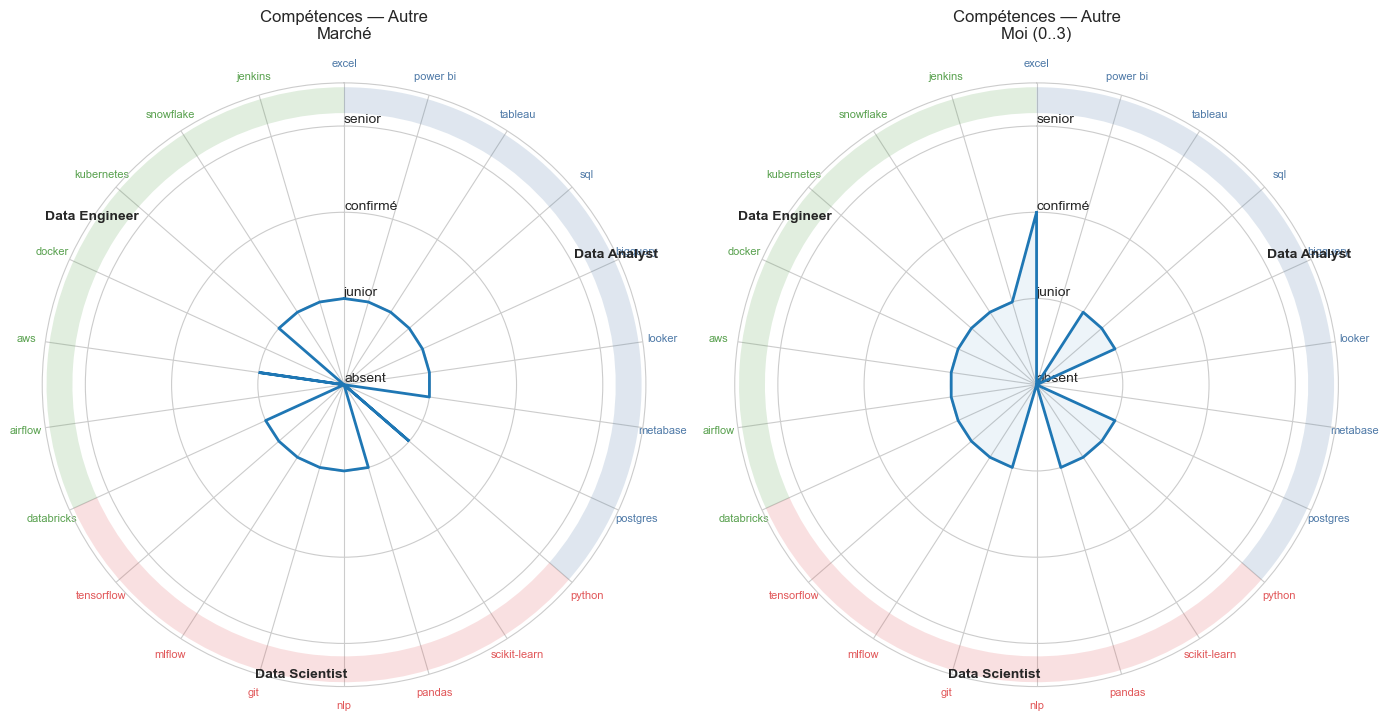

In [71]:
CATEGORY="Autre"
METRIC="binary"
SAVE_PATH="radar/6_Autre_vs_moi.png"

fig,ax=plot_radar_category(
    df,
    category=CATEGORY,
    col_category="Catégorie Poste (LLM)",
    col_skills="Compétences (LLM)",
    my_cv_skills=my_cv_skills,
    exp_years=MY_EXP_YEARS,
    top_k=10,
    metric=METRIC,                              
    skill_groups=skill_groups,
    group_order=group_order,
    group_colors=group_colors,
    shade_groups=True,
    save_path=SAVE_PATH,
    overlay=False
)

plt.show()